In [26]:
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
import json
import os
import sys
sys.path.append("../../src")
from Evaluation import plot_accuracies_bar_plot, plot_accuracies_scatter_plot

In [27]:
path_reports = "../../results/without_augmentation"

In [28]:
path_train_individual_models = os.path.join(path_reports, 'train__MLP_FCN_Resnet_MCDCNN_Encoder_Time_CNN_11_datasets.csv')

In [33]:
path_train_encoder10 = os.path.join(path_reports, 'test_Encoder10.csv')
path_train_fcn10 = os.path.join(path_reports, 'test_FCN10.csv')
path_train_mlp10 = os.path.join(path_reports, 'test_MLP10.csv')
path_train_nne10 = os.path.join(path_reports, 'test_NNE.csv')
path_train_resnet10 = os.path.join(path_reports, 'test_Resnet10.csv')
path_train_all_models = os.path.join(path_reports, 'all_ensembles_without_augmentation.csv')

In [34]:
df_train_encoder10 = pd.read_csv(path_train_encoder10)
df_train_fcn10 =pd.read_csv(path_train_fcn10)
df_train_mlp10 =pd.read_csv(path_train_mlp10)
df_train_nne10 =pd.read_csv(path_train_nne10)
df_train_resnet10 = pd.read_csv(path_train_resnet10)
df_train_all_ensembles = pd.concat([df_train_encoder10, df_train_fcn10, df_train_mlp10, df_train_nne10, df_train_resnet10])

In [35]:
df_train_all_ensembles = pd.read_csv(path_train_all_models)

In [36]:
df_train_individual_models = pd.read_csv(path_train_individual_models)

In [37]:
df_train_all_ensembles = df_train_all_ensembles[df_train_all_ensembles["dataset_name"] != "fifty_words"]
df_train_individual_models = df_train_individual_models[df_train_individual_models["dataset_name"] != "fifty_words"]

In [38]:
df_train_individual_models_mean = df_train_individual_models\
                                        .groupby(['model_name',], as_index=False)\
                                        .mean()[['model_name', 'test_acc']]
df_train_individual_models_mean = df_train_individual_models_mean\
                                        .drop(df_train_individual_models_mean[\
                                                (df_train_individual_models_mean['model_name'] == 'MCDCNN') |\
                                                (df_train_individual_models_mean['model_name'] == 'Time_CNN')].index)
df_train_individual_models_mean["ensemble"] = False
df_train_all_ensembles_mean = df_train_all_ensembles.groupby(['model_name',], as_index=False).mean()[['model_name', 'test_acc']]
df_train_all_ensembles_mean["ensemble"] = True
df_train_all_ensembles_mean = pd.concat([df_train_individual_models_mean, df_train_all_ensembles_mean], ignore_index=True)\
                                .sort_values(by=['test_acc'], ascending=False)\
                                .rename(columns={"test_acc": "avg_test_acc"})

/scratch/slurm_tmpdir/job_21779477/ipykernel_2738931/1779337110.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_individual_models_mean = df_train_individual_models\
/scratch/slurm_tmpdir/job_21779477/ipykernel_2738931/1779337110.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_train_all_ensembles_mean = df_train_all_ensembles.groupby(['model_name',], as_index=False).mean()[['model_name', 'test_acc']]


In [39]:
df_train_individual_models_mean

,model_name,test_acc,ensemble
0,Encoder,0.844542,False
1,FCN,0.677509,False
3,MLP,0.806805,False
4,Resnet,0.734801,False


In [40]:
df_train_all_ensembles_mean

,model_name,avg_test_acc,ensemble
29,NNE-average,0.915465,True
31,NNE-logistic_average,0.915145,True
32,NNE-logistic_average_with_confidence,0.915084,True
8,All-majority_vote,0.904372,True
7,All-logistic_average_with_confidence,0.903844,True
4,All-average,0.903783,True
6,All-logistic_average,0.902823,True
30,NNE-average_with_confidence,0.901324,True
5,All-average_with_confidence,0.901150,True
33,NNE-majority_vote,0.886773,True


In [41]:
df_compare_encoder = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Encoder")].reset_index(drop=True)
df_compare_fcn = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("FCN")].reset_index(drop=True)
df_compare_resnet = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("Resnet")].reset_index(drop=True)
df_compare_nne = df_train_all_ensembles_mean[df_train_all_ensembles_mean["model_name"].str.contains("NNE")].reset_index(drop=True)

In [42]:
df_compare_fcn

,model_name,avg_test_acc,ensemble
0,FCN10-majority_vote,0.700634,True
1,FCN10-logistic_average_with_confidence,0.693233,True
2,FCN10-logistic_average,0.693233,True
3,FCN10-average,0.693233,True
4,FCN10-average_with_confidence,0.686541,True
5,FCN,0.677509,False


In [43]:
def choose_model_and_best_ensemble(df):
    res = df[(df["model_name"] == df[df["ensemble"]].iloc[df['avg_test_acc'].idxmax()]['model_name']) |\
            (df["ensemble"] == False)]
    return res

In [44]:
df_best_ensemble_and_individual_model = choose_model_and_best_ensemble(df_compare_encoder)
for df in [df_compare_fcn, df_compare_resnet, df_compare_nne]:
    df_prepared = choose_model_and_best_ensemble(df)
    df_best_ensemble_and_individual_model = pd.concat([df_best_ensemble_and_individual_model, df_prepared], ignore_index=True)
df_best_ensemble_and_individual_model = df_best_ensemble_and_individual_model.sort_values(by=['avg_test_acc'], ascending=False)

# Visualise comparison of individual models with the best ensemble model

In [45]:
df_best_ensemble_and_individual_model

,model_name,avg_test_acc,ensemble
6,NNE-average,0.915465,True
0,Encoder10-majority_vote,0.879727,True
4,Resnet10-logistic_average,0.855664,True
1,Encoder,0.844542,False
5,Resnet,0.734801,False
2,FCN10-majority_vote,0.700634,True
3,FCN,0.677509,False


In [46]:
def plot_accuracies_scatter_plot(df, title='Test accuracies'):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    #plt.ylim(1)
    sns.scatterplot(data=df, s=100, x="avg_test_acc", y="model_name",)\
        .set(title=title)

In [47]:
def plot_accuracies_bar_plot(df, title='Test accuracies'):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots()
    plt.xlim(0, 1)
    sns.barplot(data=df, x="avg_test_acc", y="model_name",errorbar=('sd', 95), palette=sns.color_palette("Spectral", len(df)))\
        .set(title=title)

In [48]:
def plot_accuracies_bar_plot_with_hue(df, title='Test accuracies', figsize=(10,20)):
    sns.set(rc={"grid.color": "grey",
                "grid.linestyle": ":",
                "figure.figsize":(10,6),
                "axes.labelsize":15,
                "axes.titlesize":20})
    fig, ax = plt.subplots(figsize=figsize)
    plt.xlim(0, 1)
    sns.barplot(data=df, x="avg_test_acc", y="model_name",hue ="train_on_augmented_data" ,errorbar=('sd', 95), palette=sns.color_palette("Spectral"))\
        .set(title=title)

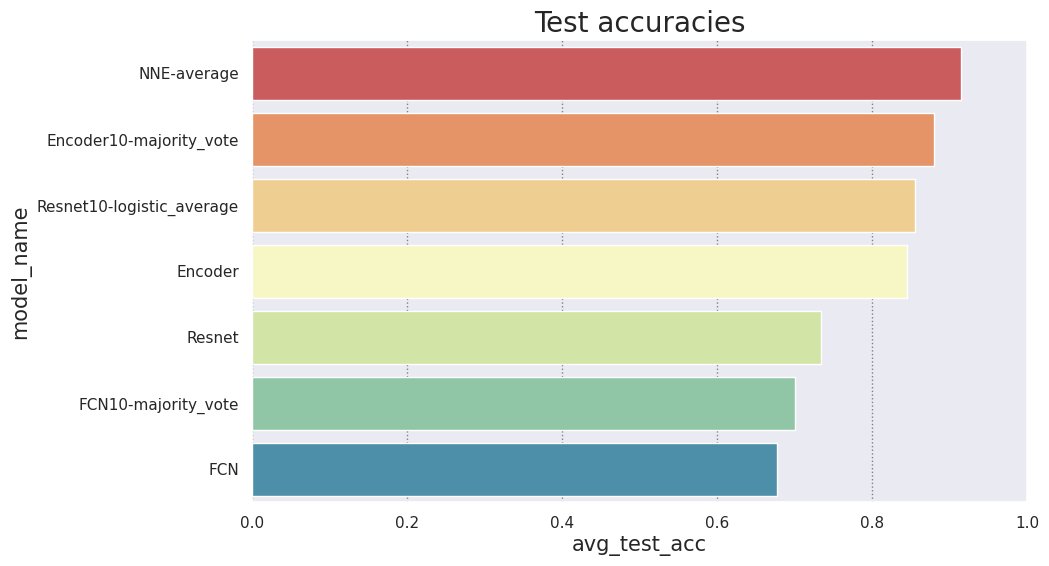

In [49]:
plot_accuracies_bar_plot(df_best_ensemble_and_individual_model)

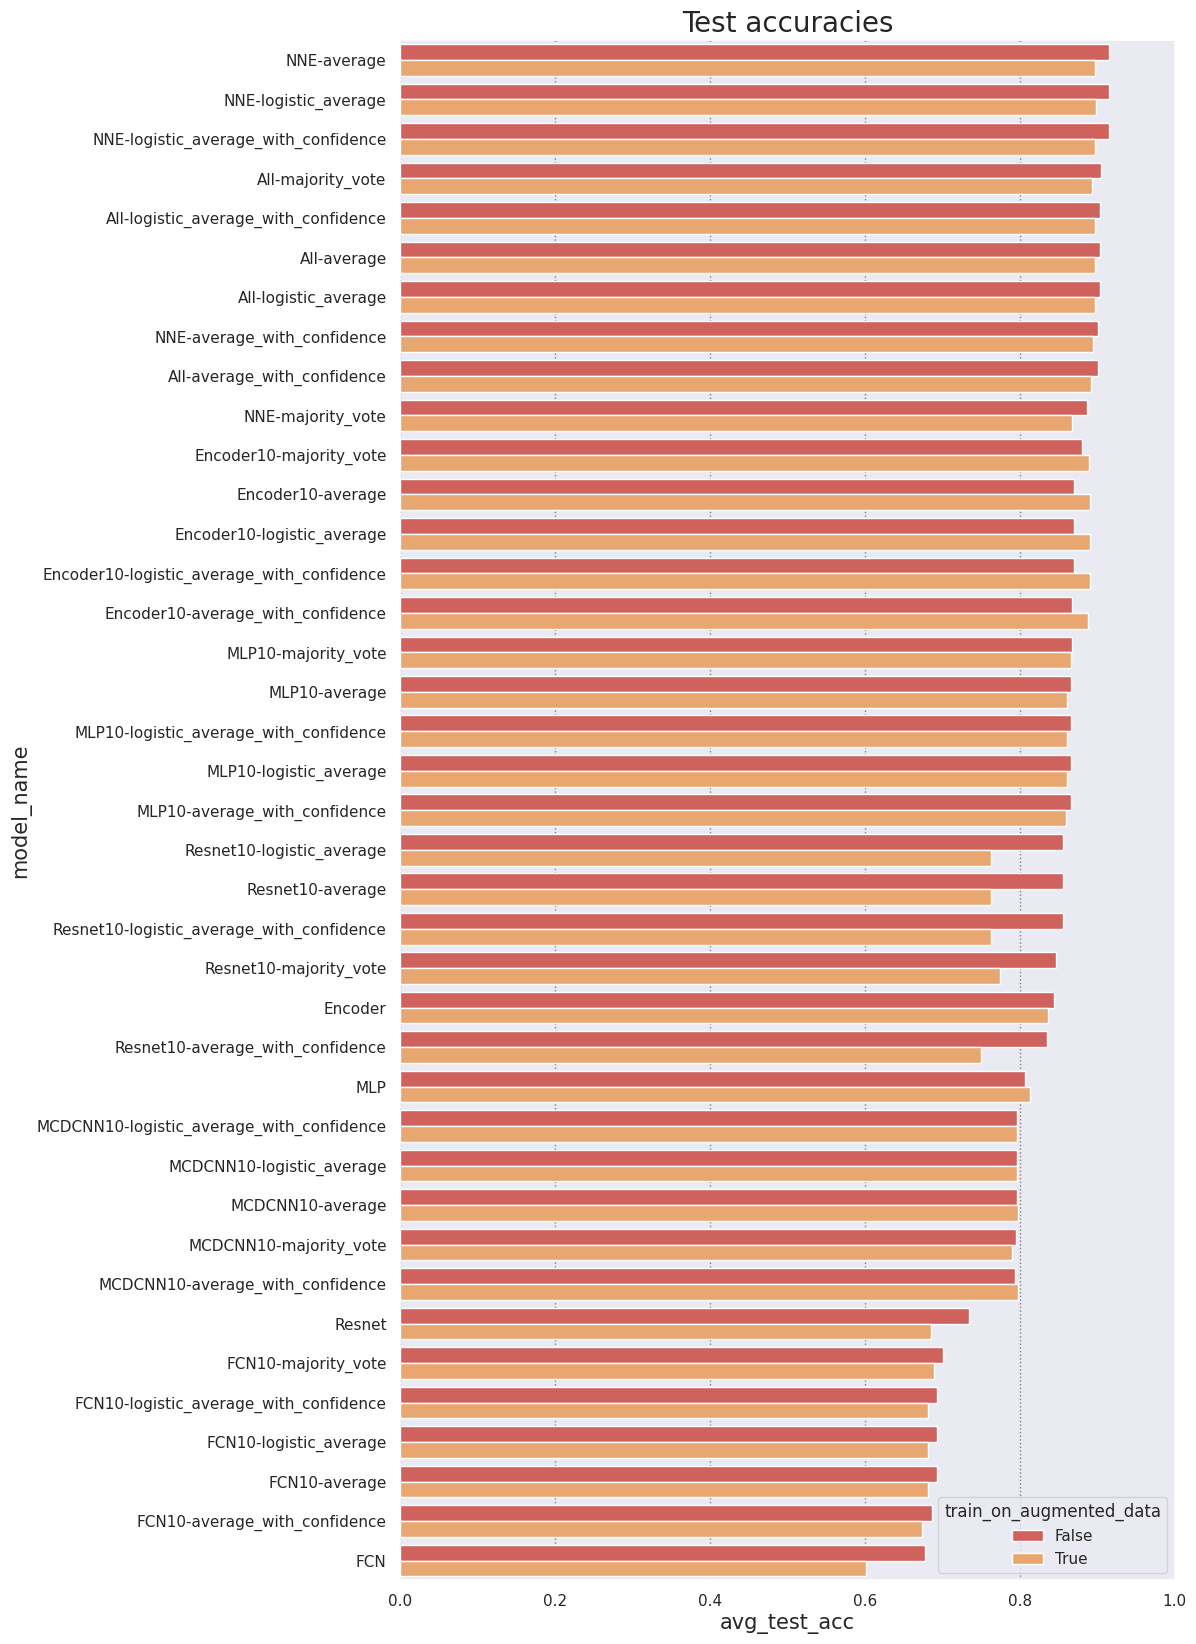

In [50]:
df_train_all_ensembles_mean_augmented = pd.read_csv('train_all_ensembles_mean_augumented_data.csv')
df_train_all_ensembles_mean_2 = df_train_all_ensembles_mean.copy()
df_train_all_ensembles_mean_2["train_on_augmented_data"] = False
df_train_all_ensembles_with_augmented = pd.concat([df_train_all_ensembles_mean_2,df_train_all_ensembles_mean_augmented])
plot_accuracies_bar_plot_with_hue(df_train_all_ensembles_with_augmented)

In [77]:
max(list(df_train_all_ensembles_mean_2.set_index("model_name")["avg_test_acc"]\
.subtract(df_train_all_ensembles_with_augmented.set_index("model_name")["avg_test_acc"])))

0.09348387331410668

In [51]:
model_to_display

['NNE-average',
 'Encoder10-majority_vote',
 'Encoder',
 'Resnet10-logistic_average',
 'Resnet',
 'FCN',
 'FCN10-majority_vote',
 'NNE-logistic_average',
 'Encoder10-average',
 'Encoder',
 'Resnet10-majority_vote',
 'FCN10-majority_vote',
 'Resnet',
 'FCN']

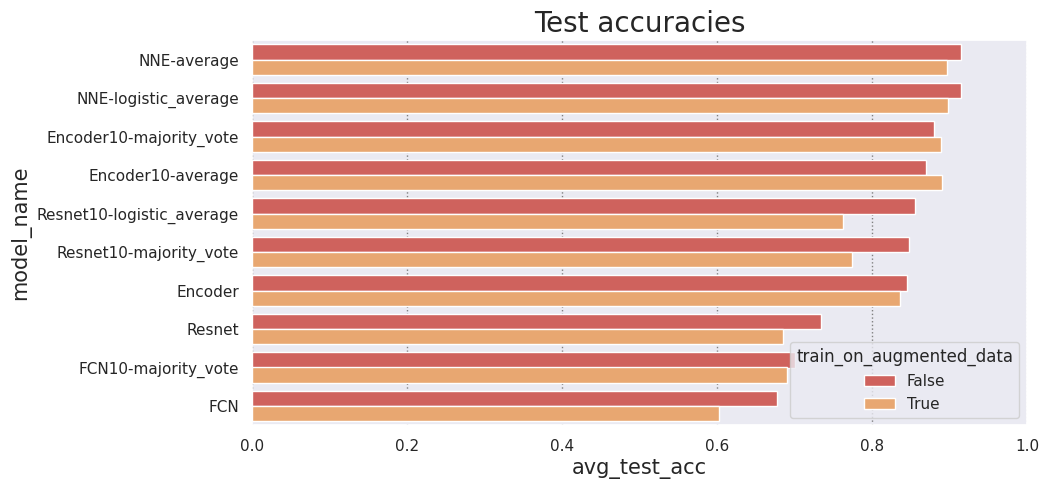

In [64]:
df_best_ensemble_and_individual_model_augmented = pd.read_csv('best_ensemble_and_individual_model_augumented_data.csv')
df_best_ensemble_and_individual_model_2 = df_best_ensemble_and_individual_model.copy()
df_best_ensemble_and_individual_model_2["train_on_augmented_data"] = False
df_best_ensemble_and_individual_model_with_augmented = pd.concat([df_best_ensemble_and_individual_model_2,df_best_ensemble_and_individual_model_augmented])

model_to_display = list(df_best_ensemble_and_individual_model_with_augmented["model_name"])
df_best_ensemble_and_individual_model_with_augmented_to_display = \
    df_train_all_ensembles_with_augmented[df_train_all_ensembles_with_augmented["model_name"].isin(model_to_display)]
plot_accuracies_bar_plot_with_hue(df_best_ensemble_and_individual_model_with_augmented_to_display, figsize=(10,5))

In [58]:
df_best_ensemble_and_individual_model_2

,model_name,avg_test_acc,ensemble,train_on_augmented_data
6,NNE-average,0.915465,True,False
0,Encoder10-majority_vote,0.879727,True,False
4,Resnet10-logistic_average,0.855664,True,False
1,Encoder,0.844542,False,False
5,Resnet,0.734801,False,False
2,FCN10-majority_vote,0.700634,True,False
3,FCN,0.677509,False,False


In [68]:
df_best_ensemble_and_individual_model_augmented

,Unnamed: 0,model_name,avg_test_acc,ensemble,train_on_augmented_data
0,6,NNE-logistic_average,0.897661,True,True
1,0,Encoder10-average,0.890929,True,True
2,1,Encoder,0.836770,False,True
3,4,Resnet10-majority_vote,0.774204,True,True
4,2,FCN10-majority_vote,0.689792,True,True
5,5,Resnet,0.684863,False,True
6,3,FCN,0.602079,False,True


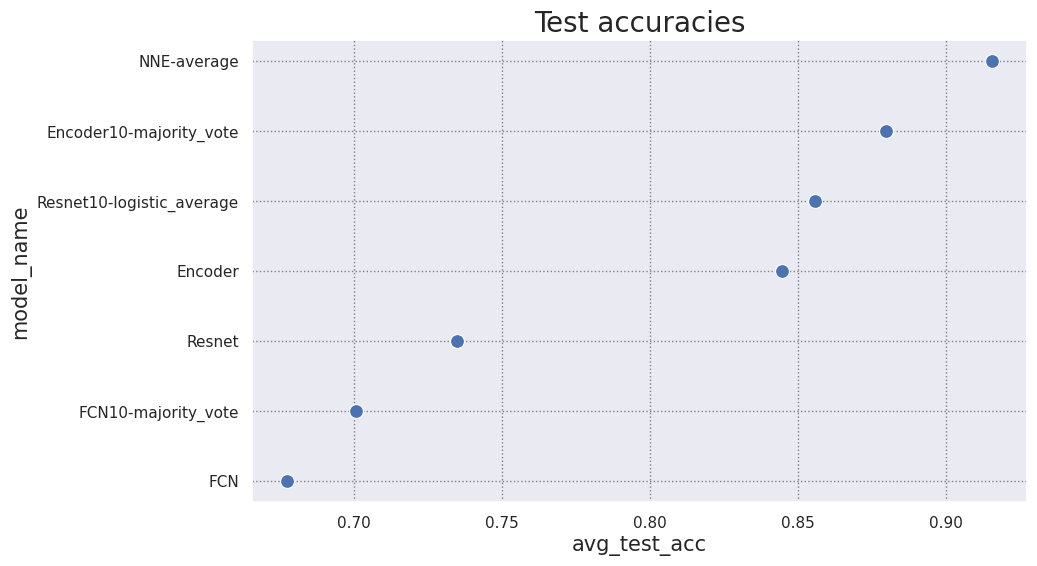

In [54]:
plot_accuracies_scatter_plot(df_best_ensemble_and_individual_model)

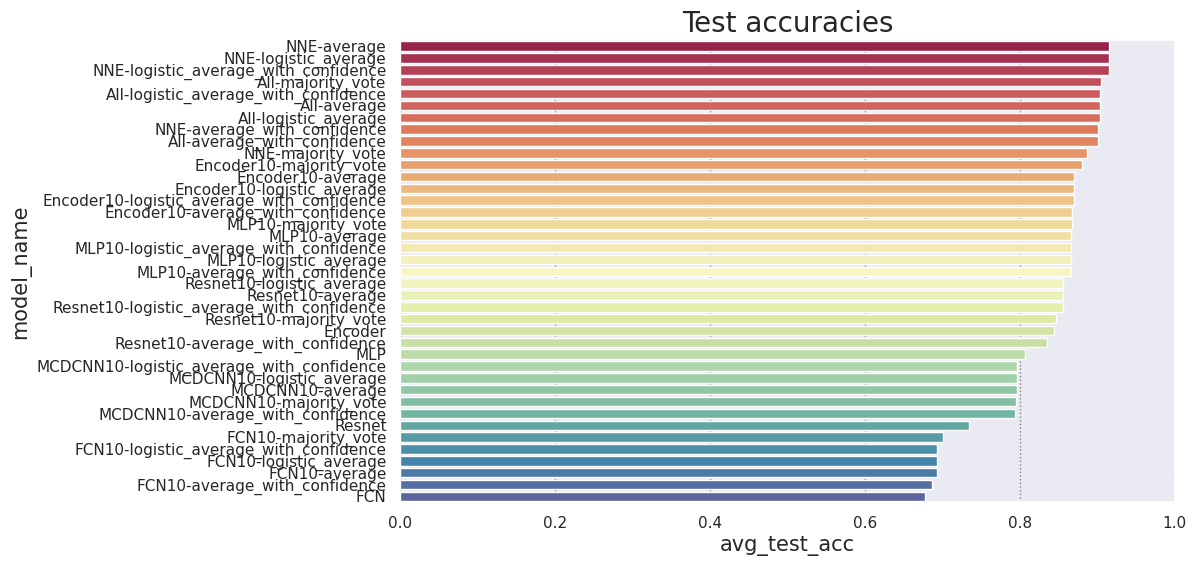

In [55]:
plot_accuracies_bar_plot(df_train_all_ensembles_mean)

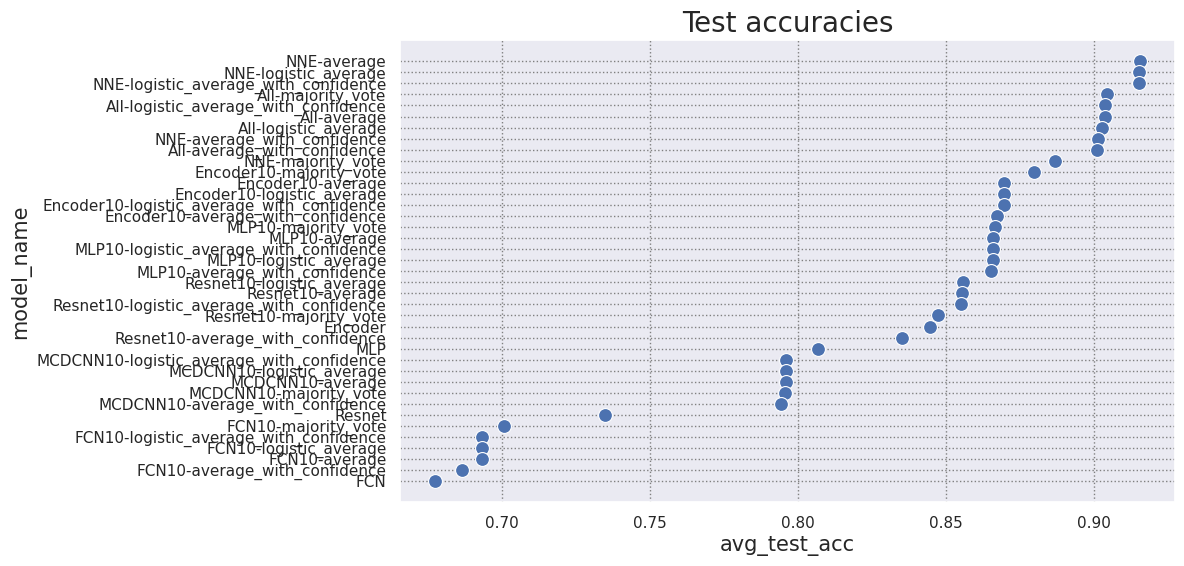

In [56]:
plot_accuracies_scatter_plot(df_train_all_ensembles_mean)

# Plot results for individual models

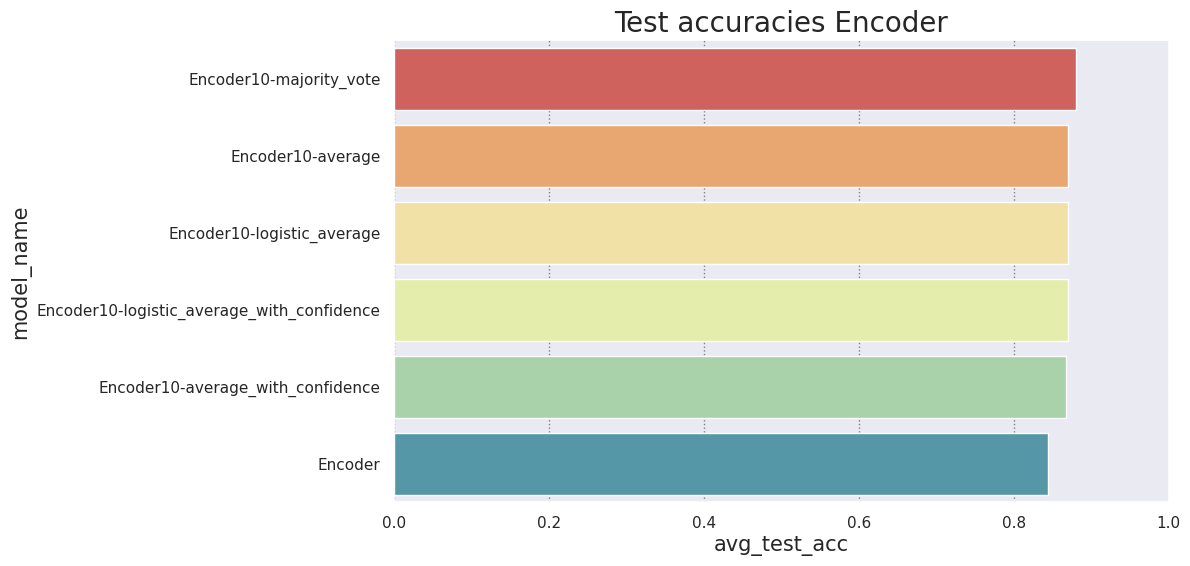

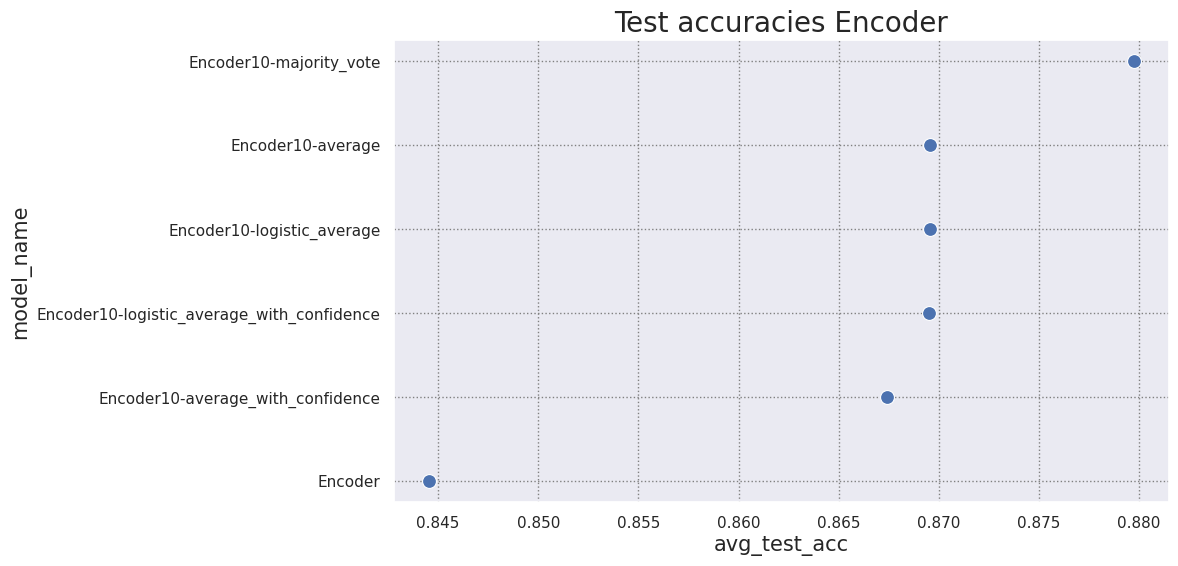

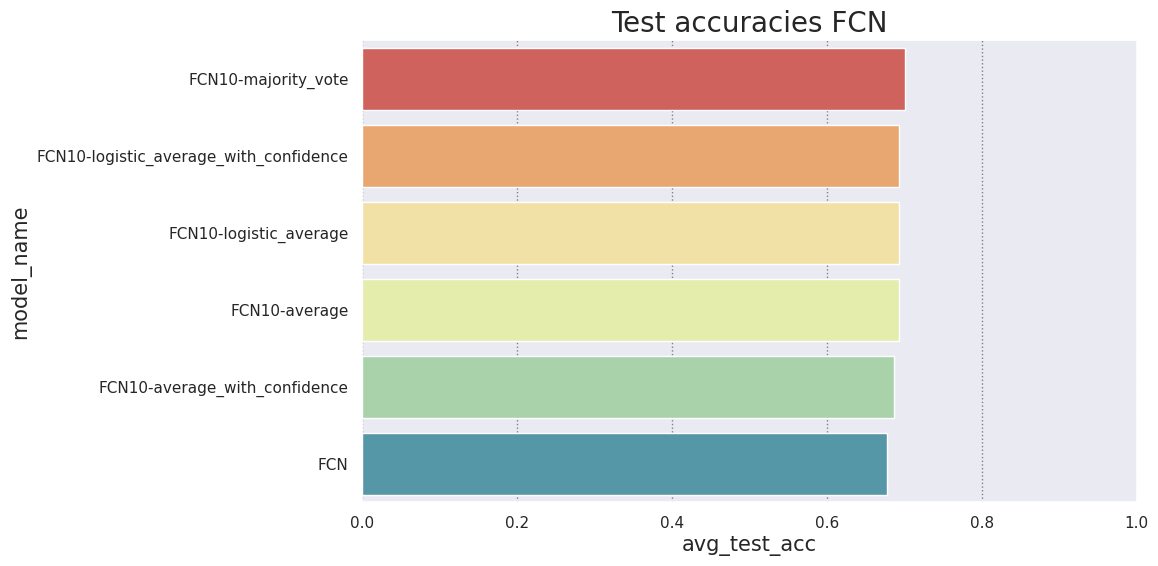

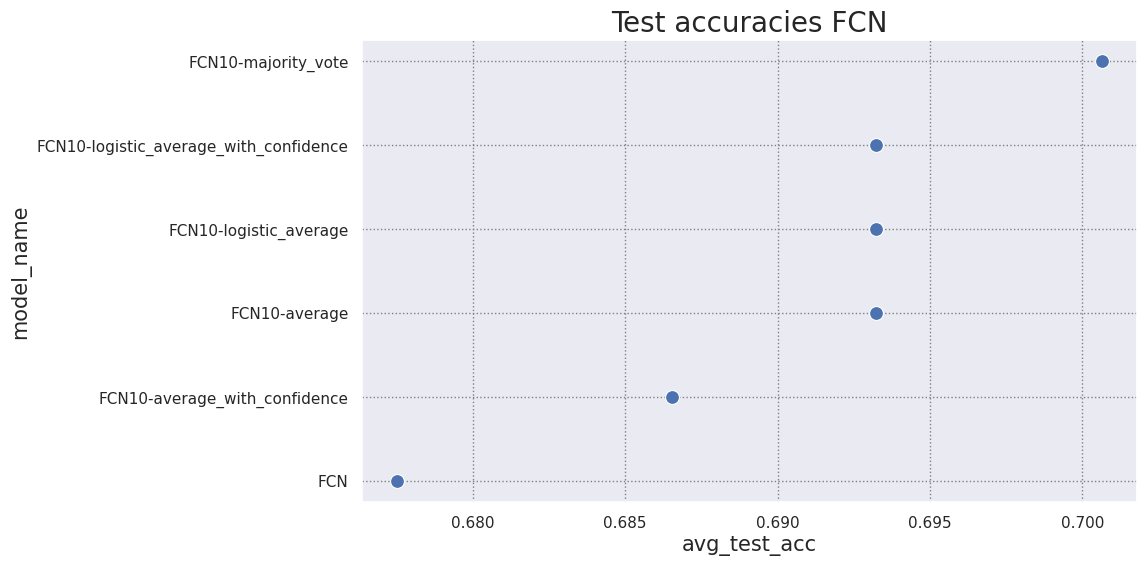

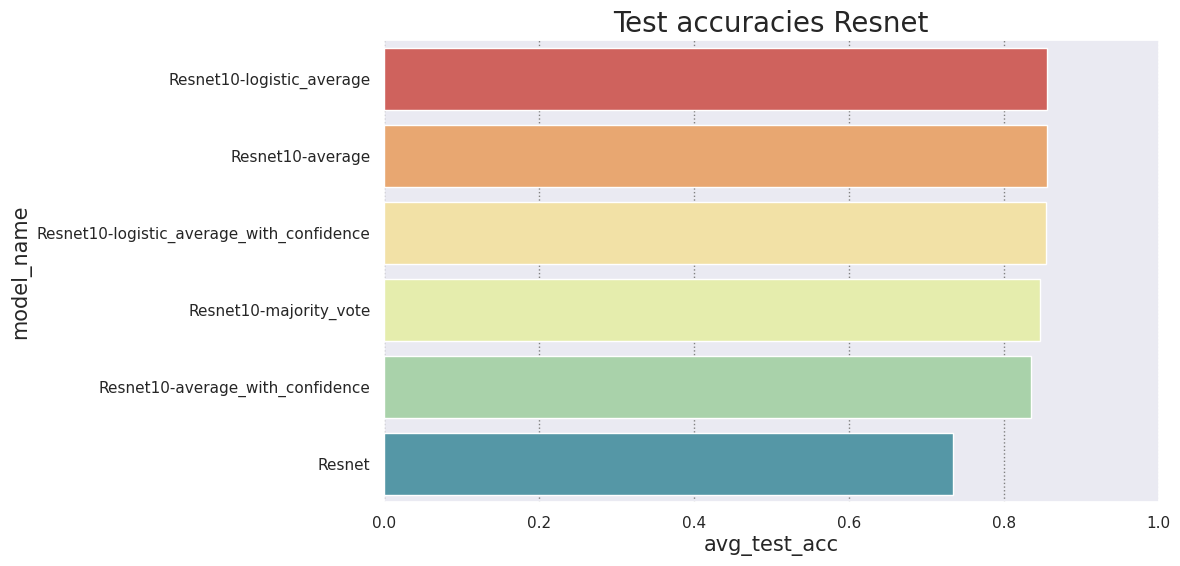

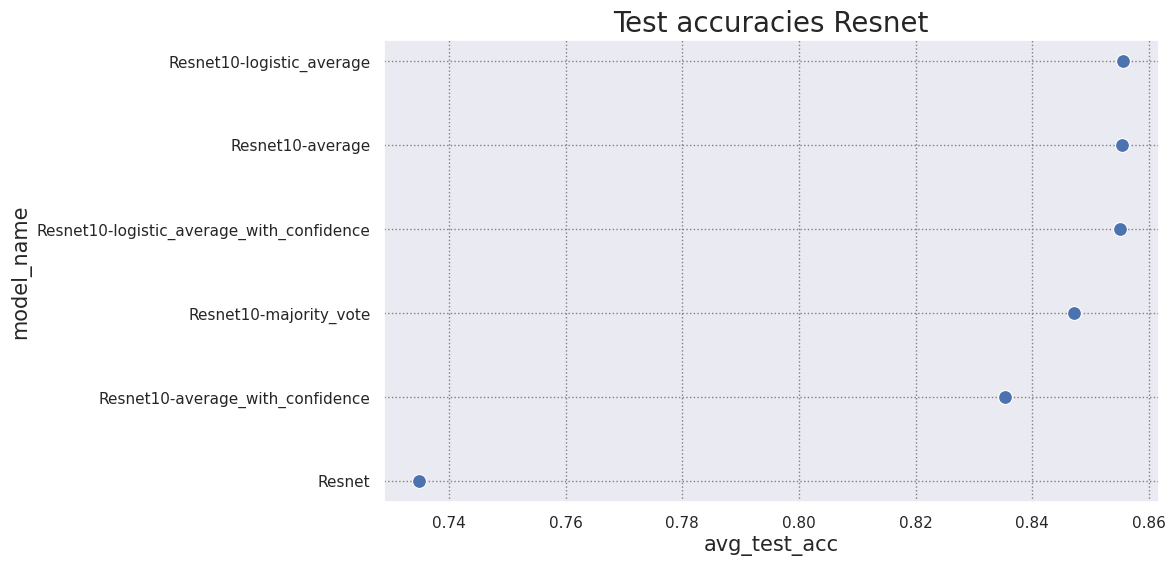

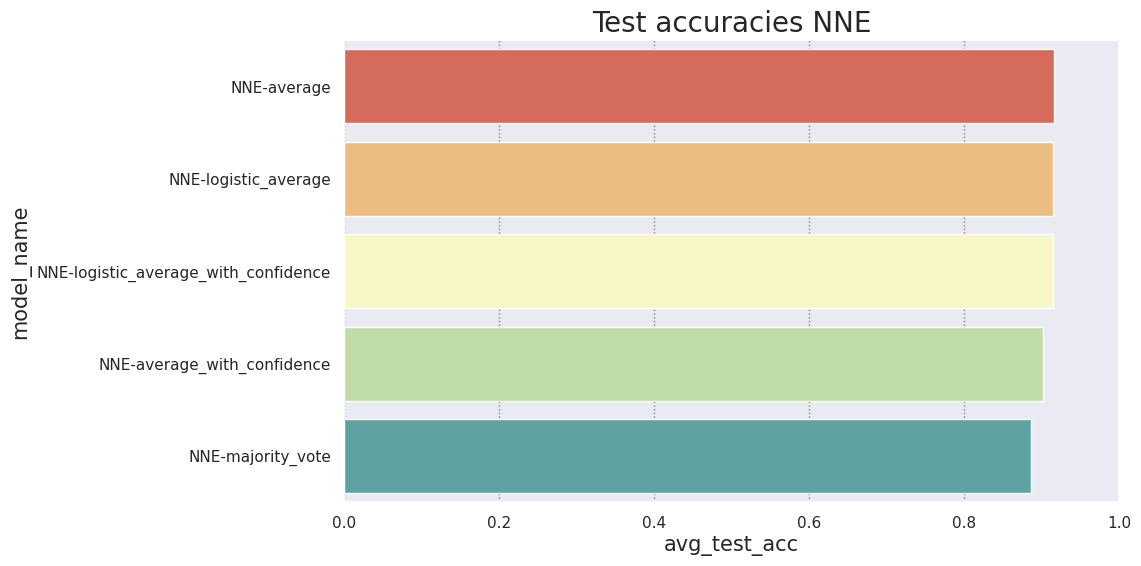

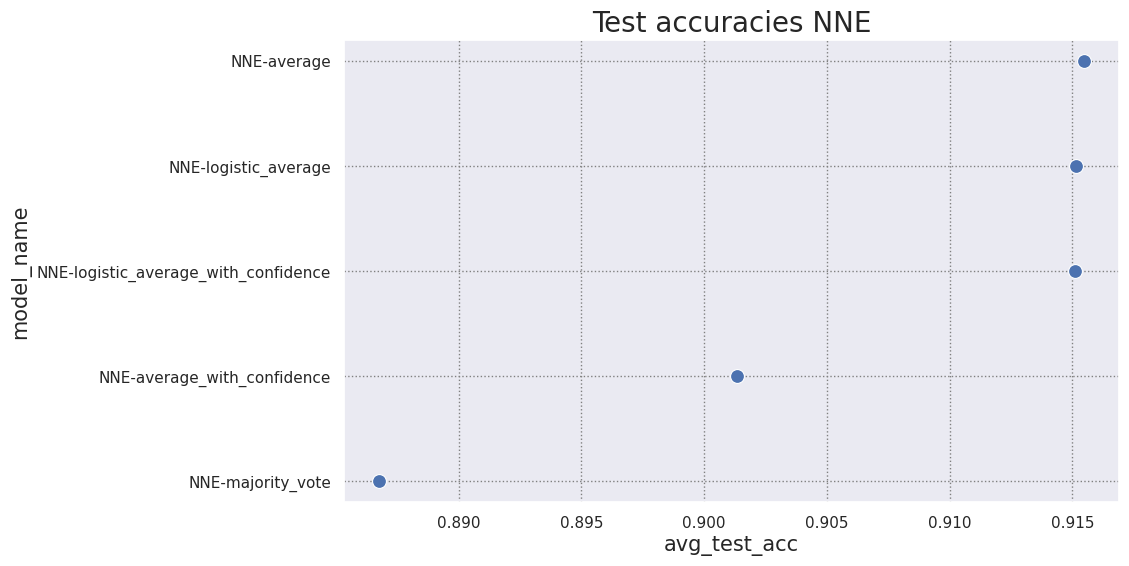

In [57]:
for df, title in zip([df_compare_encoder, df_compare_fcn, df_compare_resnet, df_compare_nne],\
                       ["Test accuracies Encoder", "Test accuracies FCN", "Test accuracies Resnet", "Test accuracies NNE"]):
    plot_accuracies_bar_plot(df, title=title)
    plot_accuracies_scatter_plot(df, title=title)